In [1]:
# numpy, matplotlib, seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# sklearn
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [2]:
# нужно разбить цены на данные классы
classes =  [(0, 12000),
           (12000, 46000)]

dataset = pd.read_csv('car19.csv')
price = dataset[['price']]
categories = []
doneFlag = False
for _, x in price.iterrows():
    for i, c in enumerate(classes):

        if c[0] <= x['price'] < c[1]:
            categories.append(i)
            breakFlag = True
            break

    if doneFlag:
        continue
dataset['Категория'] = categories
# берём колонки которые извлекли в 13 лабе
#dataset = dataset[['wheelbase', 'carlength', 'enginesize', 'compressionratio',
 #      'horsepower', 'Категория']]


In [3]:
dataset = dataset.drop(columns=['car_ID'])

In [4]:
dataset = dataset.drop(columns=['symboling'])

In [5]:
dataset = dataset.drop(columns=['highwaympg'])

In [6]:
dataset = dataset.drop(columns=['citympg'])

In [7]:
dataset = dataset.drop(columns=['peakrpm'])

In [8]:
dataset.head(100)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,price,Категория
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,13495.6,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,16500.1,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,16500.7,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,13950.2,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,17450.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,100.4,184.6,66.5,55.1,3060,181,3.43,3.27,9.0,152,13499.7,1
96,91.3,170.7,67.9,49.7,3071,181,3.43,3.27,9.0,160,17199.7,1
97,91.3,170.7,67.9,49.7,3139,181,3.43,3.27,7.8,200,19699.7,1
98,99.2,178.5,67.9,49.7,3139,181,3.43,3.27,9.0,160,18399.7,1


In [9]:
X = dataset[dataset.columns.drop(labels='Категория')]
y = dataset[['Категория']]

sc = StandardScaler()
X = sc.fit_transform(X)
X_cut = X[:, [0, 1, 5, 8, 9]]

column_number = [0, 1, 5, 8, 9]
selected_column = dataset.iloc[:, column_number]

# Вывести выбранную колонку
print(selected_column)

     wheelbase  carlength  enginesize  compressionratio  horsepower
0         88.6      168.8         130               9.0         111
1         88.6      168.8         130               9.0         111
2         94.5      171.2         152               9.0         154
3         99.8      176.6         109              10.0         102
4         99.4      176.6         136               8.0         115
..         ...        ...         ...               ...         ...
154      104.5      187.8         171               9.2         156
155      104.5      187.8         161               9.2         156
156       97.3      171.7         109               9.0          85
157       94.5      159.3         109               8.5          90
158       94.5      165.7         109               8.5          90

[159 rows x 5 columns]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [11]:
ppn = MLPClassifier(max_iter=500, solver='adam', activation='relu', verbose=True)
ppn.fit(X_train, y_train)
y1 = ppn.predict(X_test)
print('Неверно классифицированные образцы: %d' % (y_test.reset_index(drop=True)['Категория'] != pd.Series(y1.flatten())).sum())
print('Точность: %.2f' % accuracy_score(y_test, y1))

Iteration 1, loss = 0.61551023
Iteration 2, loss = 0.59655895
Iteration 3, loss = 0.57839273
Iteration 4, loss = 0.56102291
Iteration 5, loss = 0.54447244
Iteration 6, loss = 0.52875588
Iteration 7, loss = 0.51382138
Iteration 8, loss = 0.49965409
Iteration 9, loss = 0.48618200
Iteration 10, loss = 0.47337226
Iteration 11, loss = 0.46120927
Iteration 12, loss = 0.44966804
Iteration 13, loss = 0.43872070
Iteration 14, loss = 0.42832465
Iteration 15, loss = 0.41846702
Iteration 16, loss = 0.40912137
Iteration 17, loss = 0.40025426
Iteration 18, loss = 0.39184076
Iteration 19, loss = 0.38384473
Iteration 20, loss = 0.37623189
Iteration 21, loss = 0.36897914
Iteration 22, loss = 0.36205815
Iteration 23, loss = 0.35545695
Iteration 24, loss = 0.34913946
Iteration 25, loss = 0.34308702
Iteration 26, loss = 0.33729988
Iteration 27, loss = 0.33176191
Iteration 28, loss = 0.32643971
Iteration 29, loss = 0.32132546
Iteration 30, loss = 0.31641016
Iteration 31, loss = 0.31168691
Iteration 32, los

C:\Users\gross\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 95, loss = 0.16354180
Iteration 96, loss = 0.16230826
Iteration 97, loss = 0.16109559
Iteration 98, loss = 0.15990225
Iteration 99, loss = 0.15872475
Iteration 100, loss = 0.15755962
Iteration 101, loss = 0.15641186
Iteration 102, loss = 0.15528542
Iteration 103, loss = 0.15417541
Iteration 104, loss = 0.15308236
Iteration 105, loss = 0.15200498
Iteration 106, loss = 0.15094179
Iteration 107, loss = 0.14989405
Iteration 108, loss = 0.14886029
Iteration 109, loss = 0.14783884
Iteration 110, loss = 0.14682900
Iteration 111, loss = 0.14583151
Iteration 112, loss = 0.14484640
Iteration 113, loss = 0.14387270
Iteration 114, loss = 0.14291042
Iteration 115, loss = 0.14195937
Iteration 116, loss = 0.14102036
Iteration 117, loss = 0.14009219
Iteration 118, loss = 0.13918090
Iteration 119, loss = 0.13827718
Iteration 120, loss = 0.13738250
Iteration 121, loss = 0.13649937
Iteration 122, loss = 0.13562844
Iteration 123, loss = 0.13476678
Iteration 124, loss = 0.13391537
Iteration 125, 

Text(0.5, 1.1, 'Матрица неточности Персептрон\n')

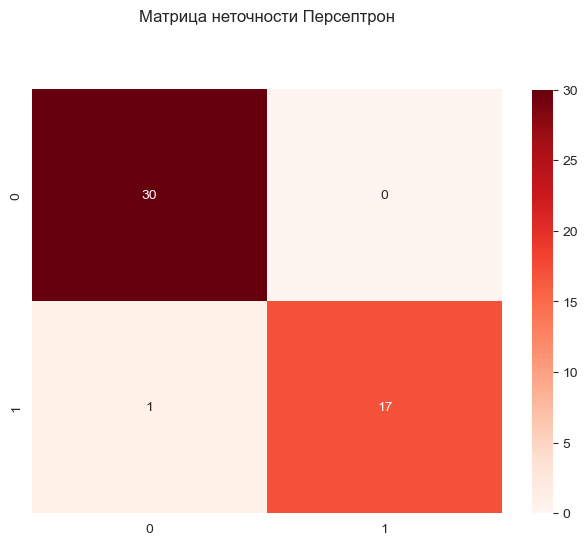

In [12]:
cnf_matrix_log = confusion_matrix(y_test, y1)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности Персептрон\n', y=1.1)

C:\Users\gross\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Неверно классифицированные образцы: 1
Точность: 0.98


Text(0.5, 1.1, 'Матрица неточности Персептрон\n')

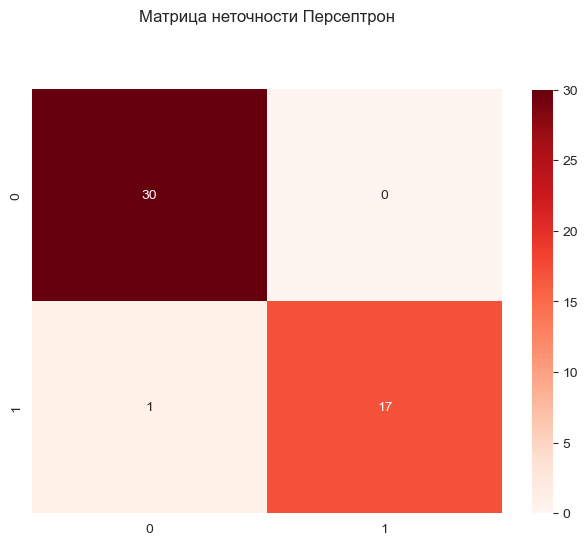

In [13]:
mlp= MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5, max_iter=10000, hidden_layer_sizes=(5,), random_state=1)
mlp.fit(X_train,y_train)
mlp_pred = mlp.predict(X_test)
print('Неверно классифицированные образцы: %d' % (y_test.reset_index(drop=True)['Категория'] != pd.Series(y1.flatten())).sum())
print('Точность: %.2f' % accuracy_score(y_test, y1))
# матрица неточности

cnf_matrix_log = confusion_matrix(y_test, mlp_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности Персептрон\n', y=1.1)

In [14]:
y_score = ppn.predict(X_test)
y_score

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1], dtype=int64)

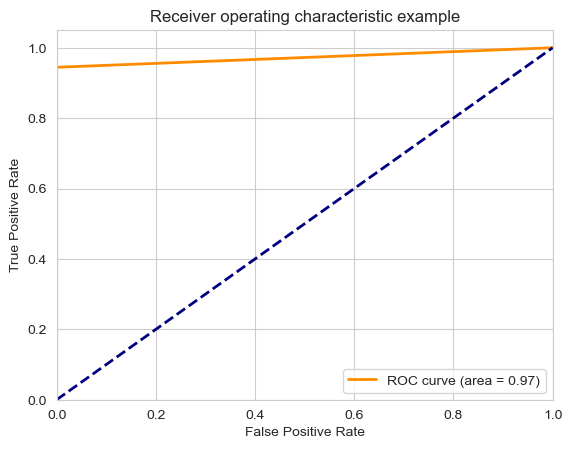

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test > 0, y_score  > 0)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Неверно классифицированные образцы: 4
Точность: 0.92


Text(0.5, 1.1, 'Матрица неточности Персептрон\n')

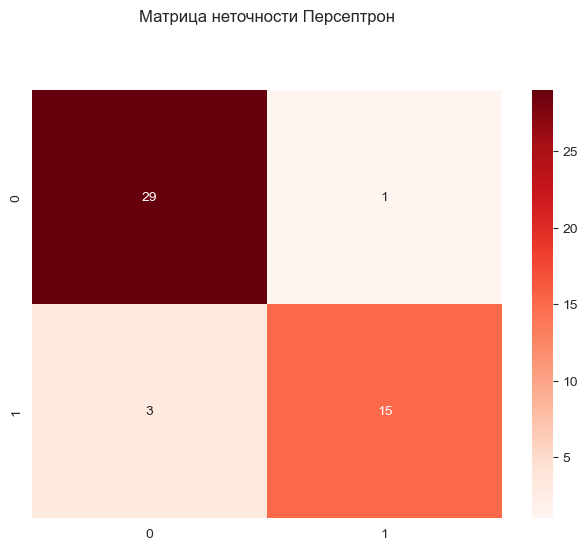

In [16]:
# Сокращенный набор
y = y.values.ravel()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_cut, y, test_size=0.3, random_state=0)

# Rest of your code remains the same...
ppn = Perceptron(max_iter=10000, random_state=0)
ppn.fit(X_train, y_train)
y1 = ppn.predict(X_test)

# Print the misclassified samples
print('Неверно классифицированные образцы: %d' % (len(y_test[y_test != y1])))

# Print the accuracy
print('Точность: %.2f' % accuracy_score(y_test, y1))

# Rest of your code remains the same...
cnf_matrix_log = confusion_matrix(y_test, y1)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True, cmap="Reds", fmt='g')
plt.tight_layout()
plt.title('Матрица неточности Персептрон\n', y=1.1)

Неверно классифицированные образцы: 4
Точность: 0.92


Text(0.5, 1.1, 'Матрица неточности Персептрон\n')

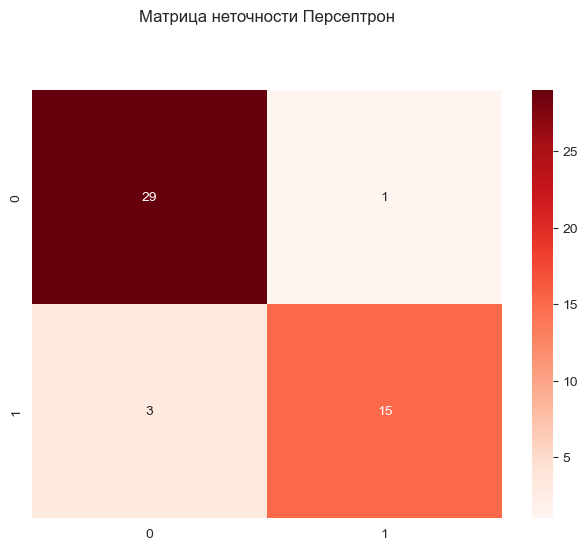

In [17]:
mlp= MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5, max_iter=10000, hidden_layer_sizes=(5,), random_state=1)
mlp.fit(X_train,y_train)
mlp_pred = mlp.predict(X_test)
print('Неверно классифицированные образцы: %d' % (y_test != mlp_pred).sum())
print('Точность: %.2f' % accuracy_score(y_test, mlp_pred))

# матрица неточности

cnf_matrix_log = confusion_matrix(y_test, mlp_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности Персептрон\n', y=1.1)

In [18]:
y_score = mlp.predict(X_test)
y_score

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0], dtype=int64)

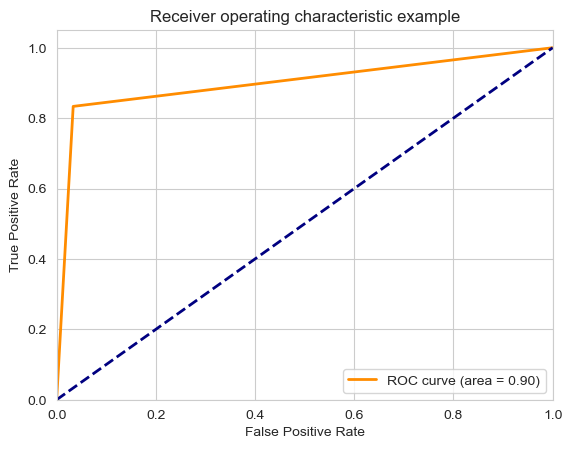

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test > 0, y_score  > 0)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()